In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [9]:
data_01 = pd.read_csv(f'USA_Housing.csv')
data_v1 = data_01.copy()


In [11]:
data_v1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [13]:
data_v1.shape

(5000, 7)

In [15]:
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [17]:
data_v1.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [19]:
data_v1.describe(include = 'object')

,Address
count,5000
unique,5000
top,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
freq,1


In [23]:
data_v1.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

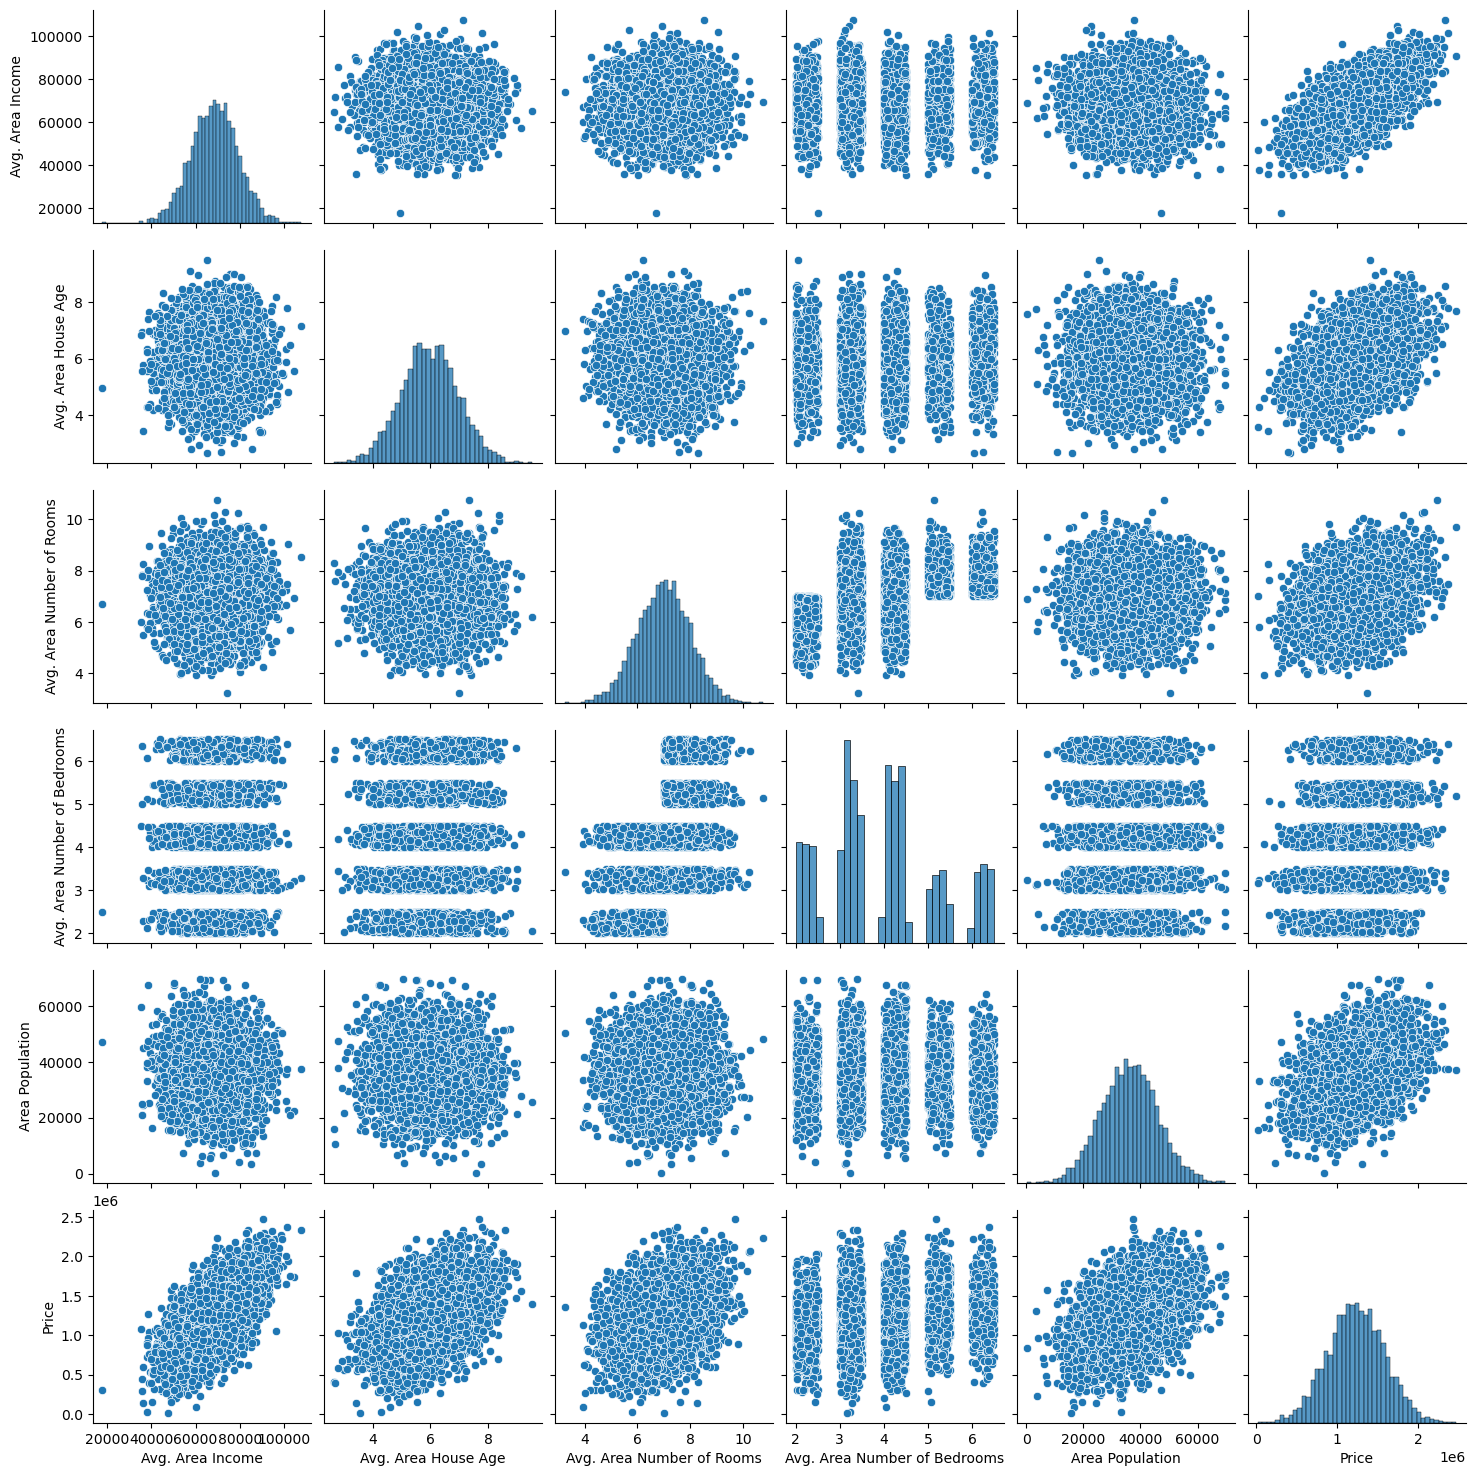

In [25]:
sns.pairplot(data_v1)

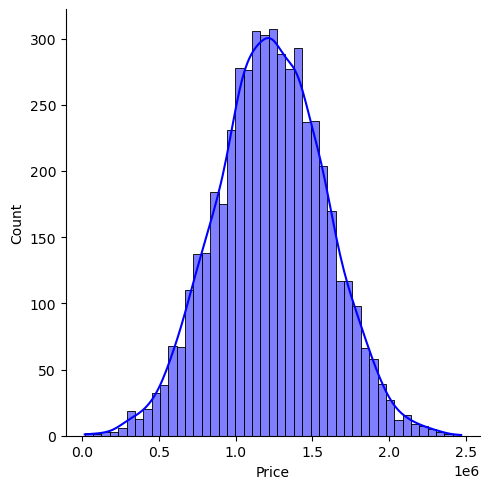

In [43]:
sns.displot(data_v1['Price'], kde = True, color = 'blue')

<Axes: >

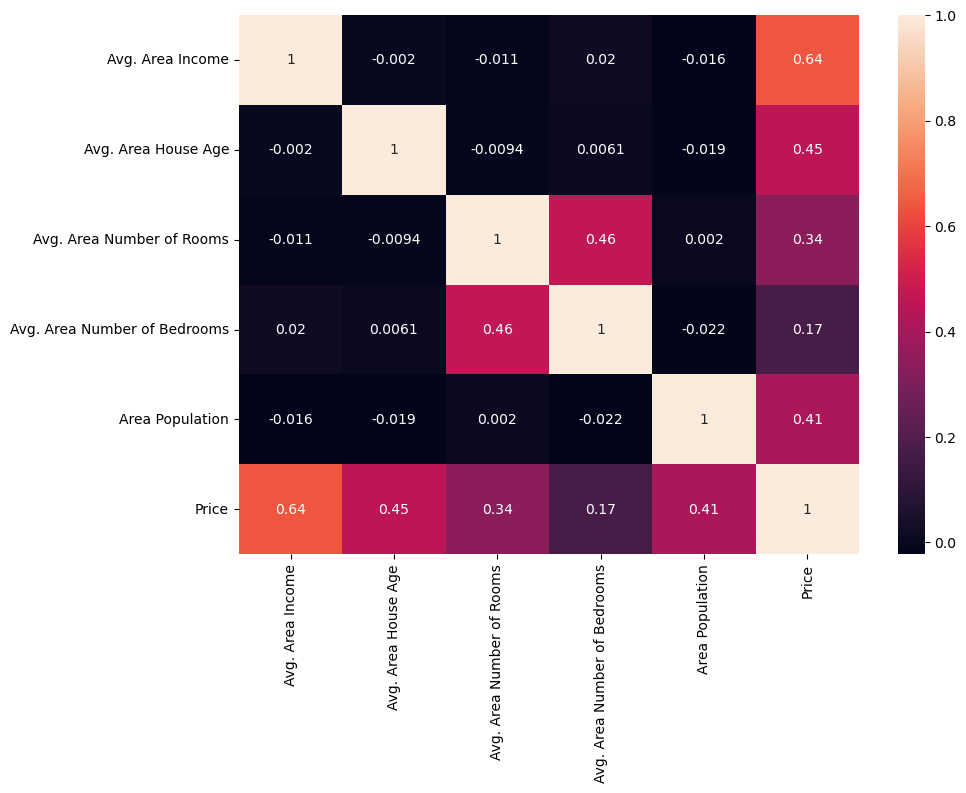

In [47]:
numeric_data = data_v1.select_dtypes(include = ['float64', 'int64'])

plt.figure(figsize = (10, 7))
sns.heatmap(numeric_data.corr(), annot = True)

In [55]:
X = data_v1[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

y = data_v1['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [57]:
X.shape, X_train.shape

((5000, 5), (3500, 5))

In [59]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [61]:
print(lm.intercept_)

-2641372.6673012357


In [63]:
print(lm.coef_)

[2.16176350e+01 1.65221120e+05 1.21405377e+05 1.31871878e+03
 1.52251955e+01]


In [69]:
coefficient = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

In [73]:
coefficient

,Coeff
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


In [75]:
prediction = lm.predict(X_test)
prediction

array([1258934.8950529 ,  822694.63411047, 1742214.39530118, ...,
       1452640.96473335,  645797.13026318, 1364943.76221892])

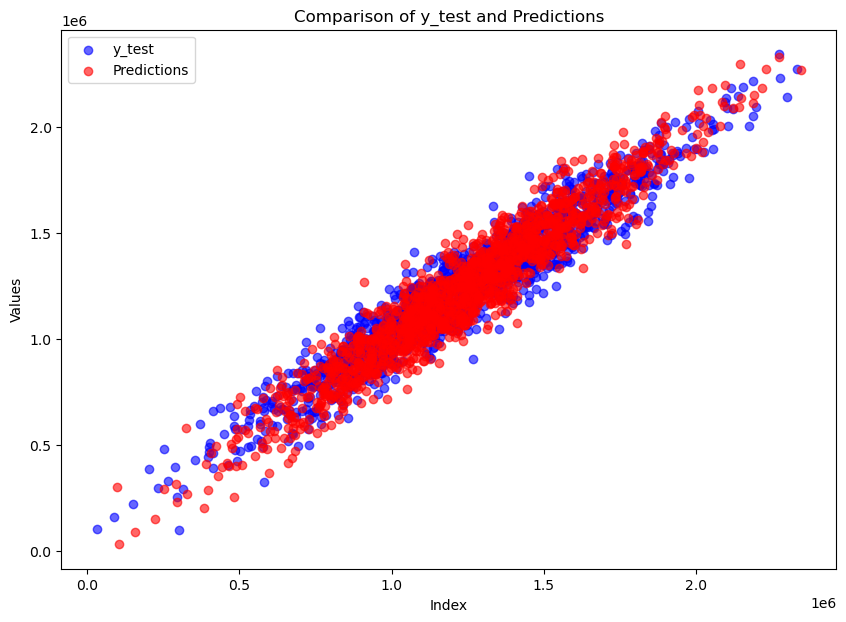

In [91]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 7))

# Plot y_test in one color
plt.scatter(y_test, prediction, color='blue', label='y_test', alpha=0.6)

# Plot predictions in another color
plt.scatter(prediction, y_test, color='red', label='Predictions', alpha=0.6)

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of y_test and Predictions')
plt.legend()

# Show the plot
plt.show()

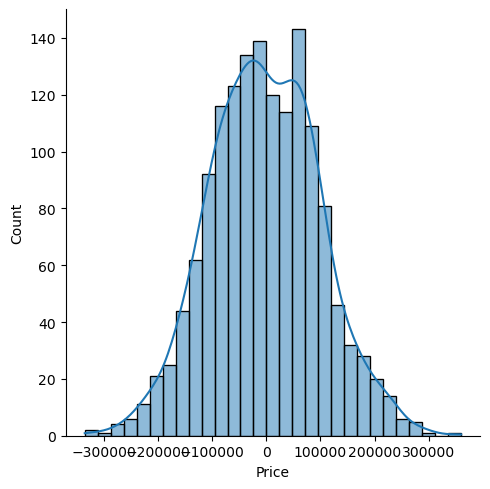

In [97]:
sns.displot((y_test - prediction), kde = True)

In [101]:
metrics.mean_absolute_error(y_test, prediction)

81257.55795855857

In [103]:
metrics.mean_squared_error(y_test, prediction)

10169125565.897493

In [105]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

100842.08231634992

## Exercise

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

In [119]:
data_02 = pd.read_csv(f'Ecommerce Customers')
data_v2 = data_02.copy()

In [121]:
data_v2.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [123]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [125]:
data_v2.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [127]:
data_v2.describe(include = 'object')

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue
freq,1,1,7


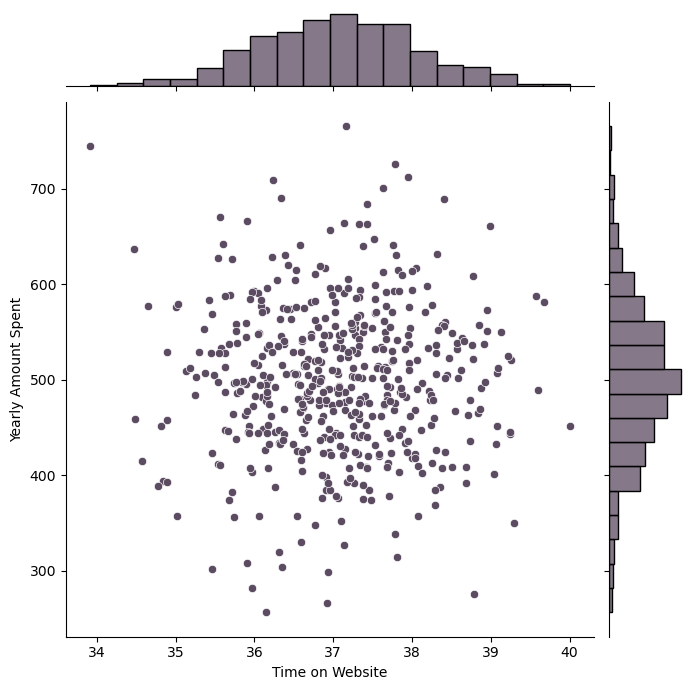

In [149]:
sns.jointplot(x ='Time on Website', y = 'Yearly Amount Spent',
              data = data_v2,
              kind = 'scatter',
              color = '#5c4c62',
              height = 7,
              ratio = 6,
             )

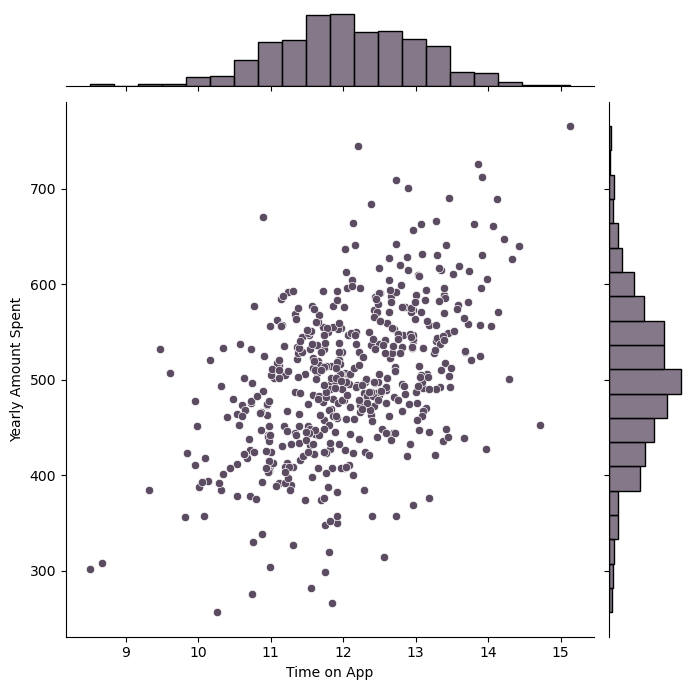

In [151]:
sns.jointplot(x ='Time on App', y = 'Yearly Amount Spent',
              data = data_v2,
              kind = 'scatter',
              color = '#5c4c62',
              height = 7,
              ratio = 6,
             )

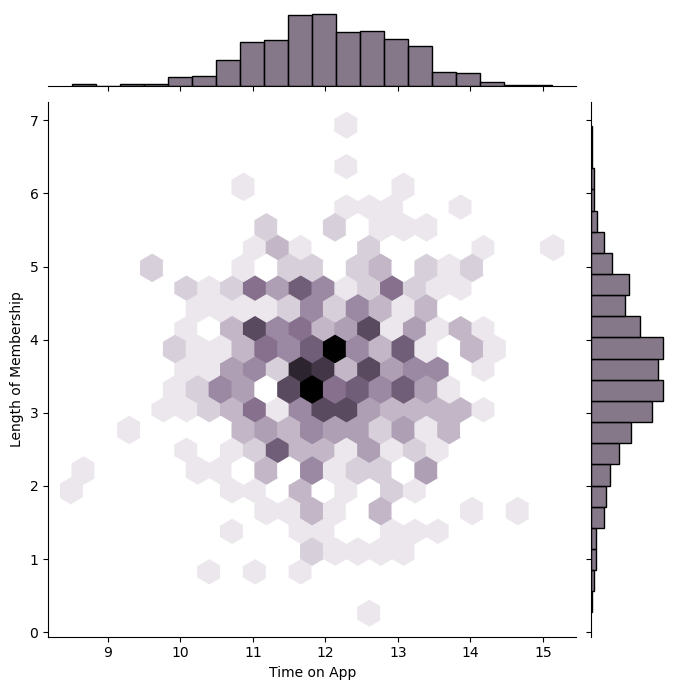

In [153]:
sns.jointplot(x ='Time on App', y = 'Length of Membership',
              data = data_v2,
              kind = 'hex',
              color = '#5c4c62',
              height = 7,
              ratio = 6,
             )

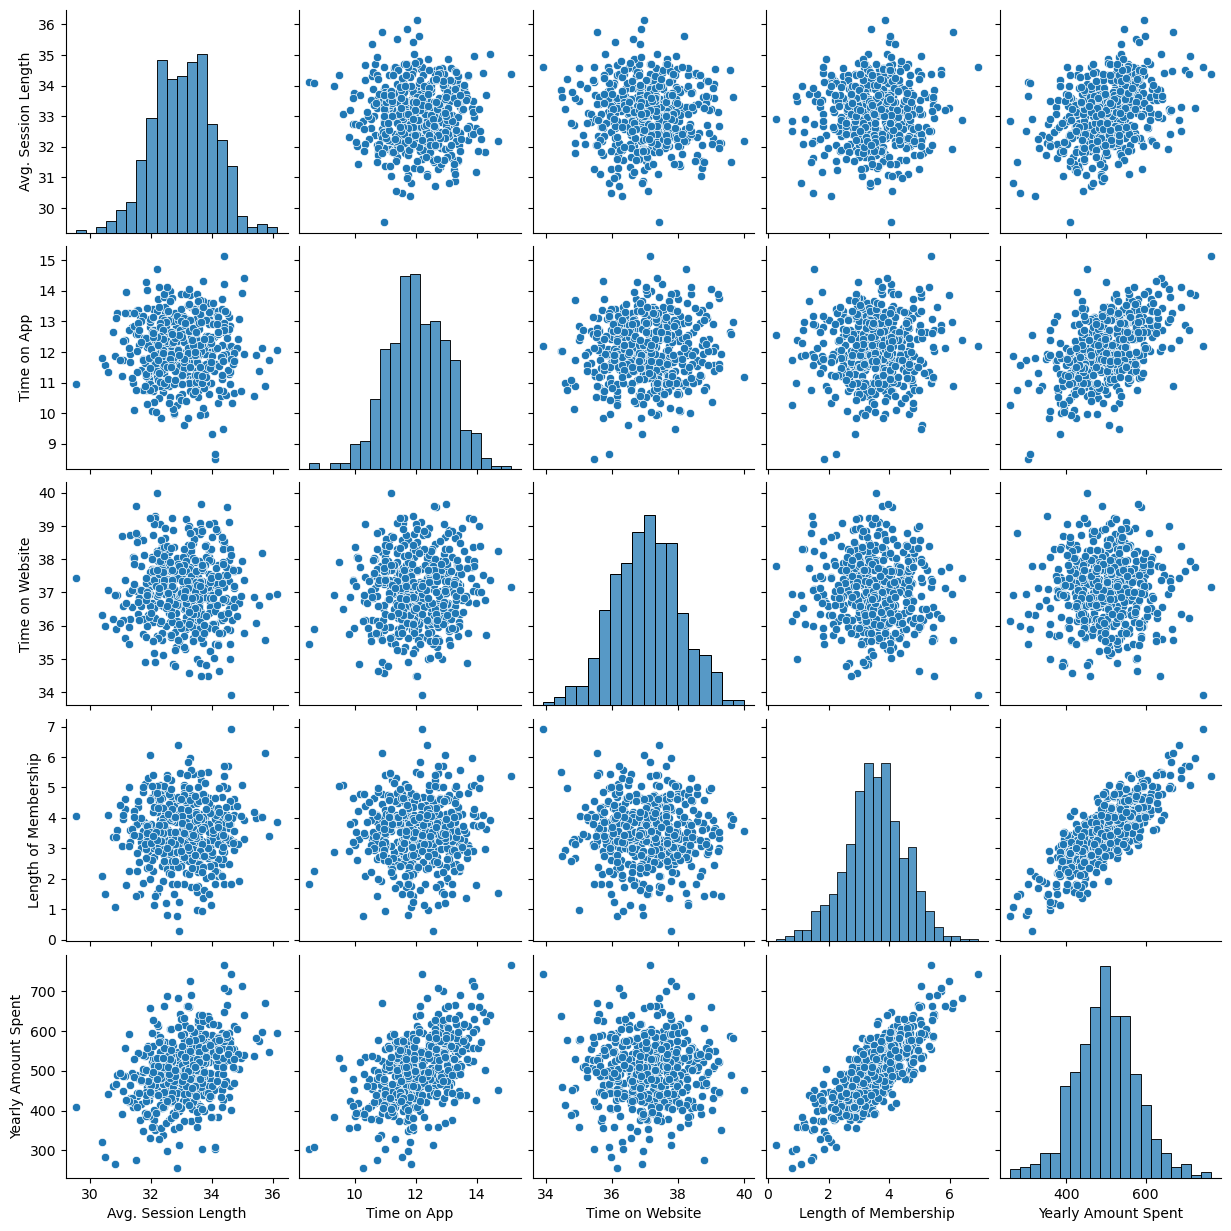

In [155]:
sns.pairplot(data_v2)

<Axes: >

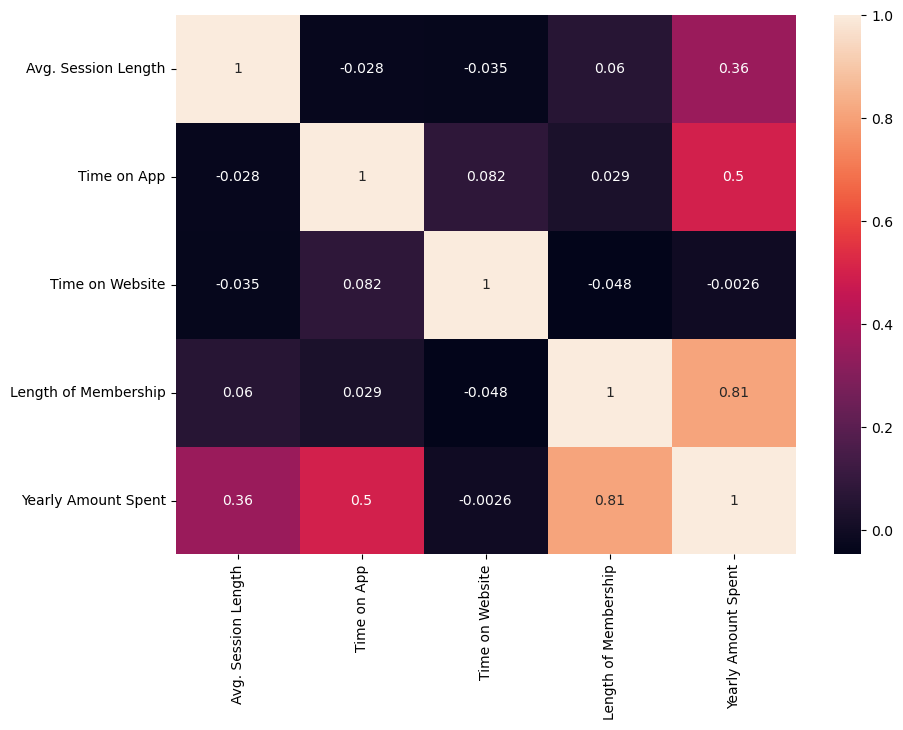

In [159]:
numerical_data = data_v2.select_dtypes(include = ['float64'])
plt.figure(figsize = (10, 7))
sns.heatmap(numerical_data.corr(), annot = True)

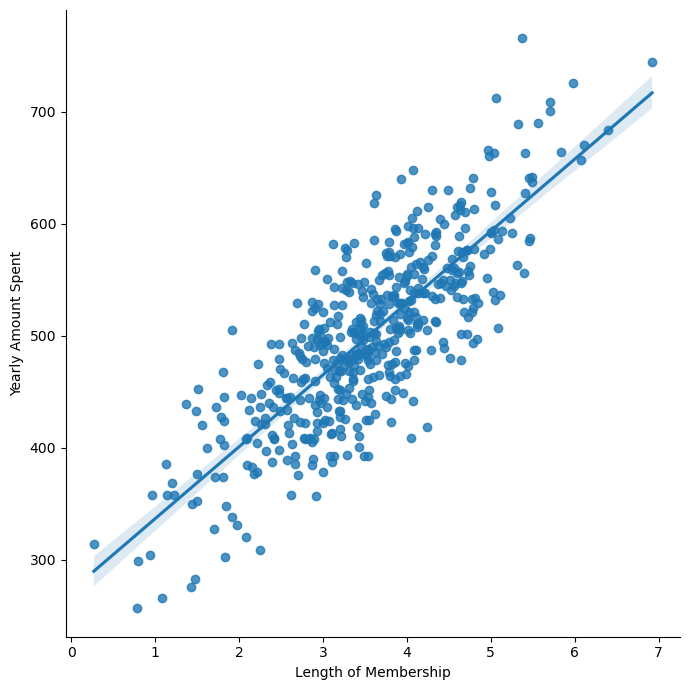

In [173]:
sns.lmplot(
    x = 'Length of Membership', y = 'Yearly Amount Spent',
    data = data_v2,
    height  = 7
)

In [185]:
X = numerical_data.drop(columns = ['Yearly Amount Spent'])
y = numerical_data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [187]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

In [189]:
print(lm2.intercept_)

-1047.932782250239


In [191]:
coefficient_lm2 = pd.DataFrame(lm2.coef_, X.columns, columns = ['Coeff'])
coefficient_lm2

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [197]:
prediction_lm2 = lm2.predict(X_test)

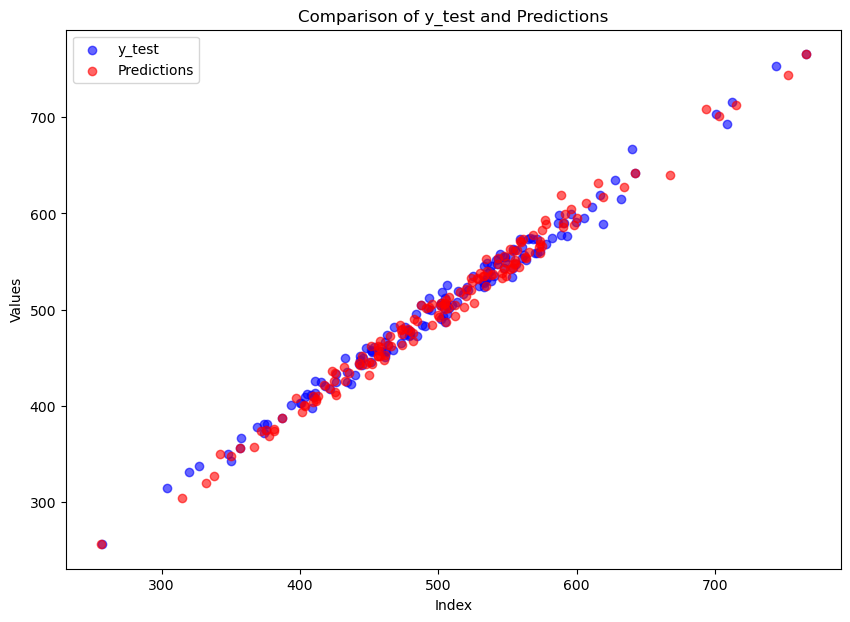

In [199]:
# Create a scatter plot
plt.figure(figsize=(10, 7))

# Plot y_test in one color
plt.scatter(y_test, prediction_lm2, color='blue', label='y_test', alpha=0.6)

# Plot predictions in another color
plt.scatter(prediction_lm2, y_test, color='red', label='Predictions', alpha=0.6)

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of y_test and Predictions')
plt.legend()

# Show the plot

In [205]:
MAE = metrics.mean_absolute_error(y_test, prediction_lm2)
MSE = metrics.mean_squared_error(y_test, prediction_lm2)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, prediction_lm2))

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 7.228148653430815
MSE: 79.81305165097409
RMSE: 8.933815066978614


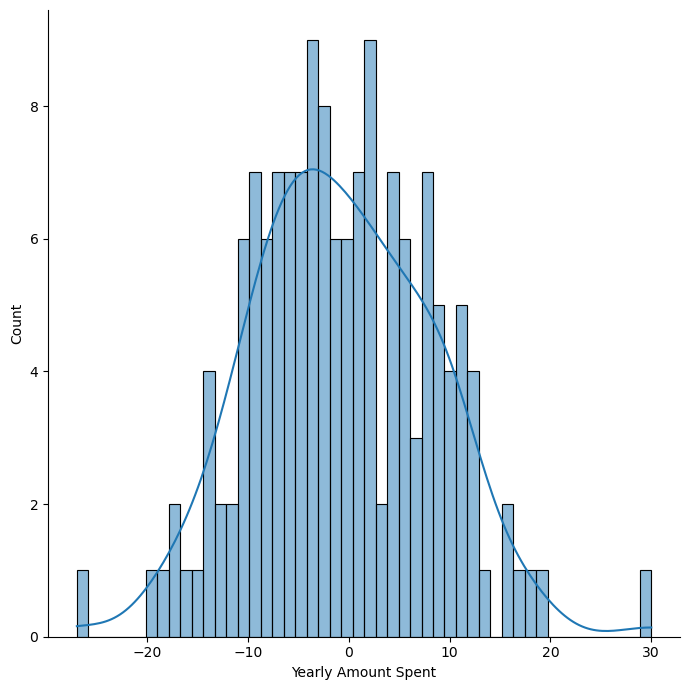

In [213]:
# Residuals

#You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

sns.displot((y_test - prediction_lm2),
            kde = True,
            bins = 50,
            height = 7)

## Conclusion

* We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [217]:
oefficient_lm2 = pd.DataFrame(lm2.coef_, X.columns, columns = ['Coeff'])
coefficient_lm2

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
